# **FIFA WORLD CUP - Data gathering**

In this notebook we will construct a dataset with data from the World Cups from 1930 to 2014 for each of the teams that have ever participated. 

We will use the historical data about all World Cup editions (WorldCups.csv), all matches (WorldCupMatches.csv) that were part of the cups and all players (WorldCupPlayers.csv) that have played in any matche.

Both datasets can be found in the [FIFA World Cup](https://www.kaggle.com/abecklas/fifa-world-cup/home) data set in Kaggle.

We begin by loading and checking the datasets.

In [1]:
import pandas as pd
import numpy as np

#loading and checking the data
WorldCups = pd.read_csv('data/WorldCups.csv')
WorldCupMatches = pd.read_csv('data/WorldCupMatches.csv')

In [2]:
print(WorldCups.tail(), '\n\n')

print(WorldCups.info())

    Year       Country   Winner   Runners-Up        Third          Fourth  \
15  1998        France   France       Brazil      Croatia     Netherlands   
16  2002   Korea/Japan   Brazil      Germany       Turkey  Korea Republic   
17  2006       Germany    Italy       France      Germany        Portugal   
18  2010  South Africa    Spain  Netherlands      Germany         Uruguay   
19  2014        Brazil  Germany    Argentina  Netherlands          Brazil   

    GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
15          171              32             64  2.785.100  
16          161              32             64  2.705.197  
17          147              32             64  3.359.439  
18          145              32             64  3.178.856  
19          171              32             64  3.386.810   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null objec


The atribute Attendance is misformatted. Let's fix it with a lambda function.


In [3]:
#adjusting data formats
WorldCups['Attendance'] = WorldCups['Attendance'].apply(lambda x: x.replace('.',''))
WorldCups['Attendance'] = pd.to_numeric(WorldCups['Attendance'])
#for feature in ['Country', 'Winner', 'Runners-Up', 'Third', 'Fourth']:
#    WorldCups[feature] = WorldCups[feature].astype('category')
    
WorldCups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.6+ KB


In [4]:
print(WorldCupMatches.head())

print(WorldCupMatches.info())

     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0


Next we will extract the year when every matche happend. The column Year will be usefull in the future.
We will also fix some team names problems.


In [5]:
#droping null rows
WorldCupMatches = WorldCupMatches.dropna(axis='rows', how='all')

#converting year column to category type
WorldCupMatches['Year'] = WorldCupMatches['Year'].astype('int')

#converting Datetime colum to datetime type
WorldCupMatches['Datetime'] = pd.to_datetime(WorldCupMatches['Datetime'])

#some names have bad character
WorldCupMatches['Home Team Name'] = WorldCupMatches['Home Team Name'].apply(lambda x: x.replace('rn">',''))
WorldCupMatches['Away Team Name'] = WorldCupMatches['Away Team Name'].apply(lambda x: x.replace('rn">',''))

#During the division, west Germany appears as Germany FR
for column in ['Winner', 'Runners-Up', 'Third', 'Fourth']:
    WorldCups.loc[WorldCups[column]=='Germany FR',column]='Germany'
WorldCupMatches.loc[WorldCupMatches['Home Team Name']=='Germany FR','Home Team Name']='Germany'
WorldCupMatches.loc[WorldCupMatches['Away Team Name']=='Germany FR','Away Team Name']='Germany'

#Iran changes name after revolution
WorldCupMatches.loc[WorldCupMatches['Home Team Name']=='IR Iran','Home Team Name']='Iran'
WorldCupMatches.loc[WorldCupMatches['Away Team Name']=='IR Iran','Away Team Name']='Iran'

WorldCupMatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 20 columns):
Year                    852 non-null int64
Datetime                852 non-null datetime64[ns]
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
d

In [6]:
WorldCupMatches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA



Now we can construct a list of teams names and teams initials. They will be the base for our new dataset.


In [7]:
#Constructs lists of teams and teams initials with unique occurence
Home_Team = list(pd.unique(WorldCupMatches['Home Team Name']))
Home_Team_Initials = []
for i, team in enumerate(Home_Team):
    Home_Team_Initials.append(list(WorldCupMatches.loc[WorldCupMatches['Home Team Name']==team,'Home Team Initials'])[0])
    
Away_Team = list(pd.unique(WorldCupMatches['Away Team Name']))
Away_Team_Initials = []
for i, team in enumerate(Away_Team):
    Away_Team_Initials.append(list(WorldCupMatches.loc[WorldCupMatches['Away Team Name']==team,'Away Team Initials'])[0])

Team = pd.unique(pd.concat([pd.Series(Home_Team), pd.Series(Away_Team)]))
Team_Initials = pd.unique(pd.concat([pd.Series(Home_Team_Initials), pd.Series(Away_Team_Initials)]))

The new dataset is WorlddCupTeams.

In [8]:
#Now we can create our new data frame
WorldCupTeams = pd.DataFrame(Team, columns=['Team'])
WorldCupTeams['Team Initials'] = Team_Initials

A team name can appear in Home Team Name or Away Team Name columns of the WorldCupMatches dataset. We will loop through each year to count how many edition each team has attended.

In [9]:
#appearances
appearances = []
for team in WorldCupTeams['Team']:
    sum_app = 0
    for Y in WorldCupMatches['Year'].unique():
        condition = ((WorldCupMatches['Home Team Name'] == team) | (WorldCupMatches['Away Team Name'] == team)) & (WorldCupMatches['Year']== Y)
        sum_app = sum_app + WorldCupMatches['Year'].loc[condition].any()
    appearances.append(sum_app)
    
WorldCupTeams['Appearances'] = appearances

del appearances

How many times each team was winner, second, third or fourth?

In [10]:
#Columns with the number first, second, third and fourth places
for column in ['Winner', 'Runners-Up', 'Third', 'Fourth']:
    column_values = []
    for t in WorldCupTeams['Team']:
        column_values.append(len(WorldCups.loc[WorldCups[column]==t,column]))
    WorldCupTeams[column] = column_values

WorldCupTeams['Finals'] = WorldCupTeams['Winner'] + WorldCupTeams['Runners-Up']
    
WorldCupTeams['Semi-finals'] = 0
for column in ['Winner', 'Runners-Up', 'Third', 'Fourth']:
    WorldCupTeams['Semi-finals'] = WorldCupTeams['Semi-finals'] + WorldCupTeams[column]
    
WorldCupTeams.sort_values(by='Winner', ascending=False, inplace=True)

How many times a given team played a Round of 16 and Quarter-finals? 
How many matches, how many draws, won and lost matches.
How many goals? Does it make a difference in which condition the goals were scored? And the matche attendance?

In [11]:
#quarter-finals, round of 16, matches played, won, lost and draws

matches = {'Quarter-finals':[],
           'Round of 16':[],
           'Matches':[],
           'Won Matches':[],
           'Lost Matches':[],
           'Draws':[]}

attendance = []
for team in WorldCupTeams['Team']:
    condition = (WorldCupMatches['Home Team Name']==team) | (WorldCupMatches['Away Team Name']==team)
    matches['Matches'].append(sum(condition))
    
    attendance.append(np.nansum(WorldCupMatches['Attendance'].loc[condition]))
    
    matches['Quarter-finals'].append(sum(WorldCupMatches['Stage'].loc[condition] == 'Quarter-finals'))
    matches['Round of 16'].append(sum(WorldCupMatches['Stage'].loc[condition] == 'Round of 16'))
    
    condition = WorldCupMatches['Home Team Name']==team
    condition = WorldCupMatches['Home Team Goals'].loc[condition] > WorldCupMatches['Away Team Goals'].loc[condition]
    results = 0
    results = sum(condition)
    condition = WorldCupMatches['Away Team Name']==team
    condition = WorldCupMatches['Away Team Goals'].loc[condition] > WorldCupMatches['Home Team Goals'].loc[condition]
    matches['Won Matches'].append(results + sum(condition))
    
    condition = WorldCupMatches['Home Team Name']==team
    condition = WorldCupMatches['Home Team Goals'].loc[condition] < WorldCupMatches['Away Team Goals'].loc[condition]
    results = 0
    results = sum(condition)
    condition = WorldCupMatches['Away Team Name']==team
    condition = WorldCupMatches['Away Team Goals'].loc[condition] < WorldCupMatches['Home Team Goals'].loc[condition]
    matches['Lost Matches'].append(results + sum(condition))
    
    condition = WorldCupMatches['Home Team Name']==team
    condition = WorldCupMatches['Home Team Goals'].loc[condition] == WorldCupMatches['Away Team Goals'].loc[condition]
    results = 0
    results = sum(condition)
    condition = WorldCupMatches['Away Team Name']==team
    condition = WorldCupMatches['Away Team Goals'].loc[condition] == WorldCupMatches['Home Team Goals'].loc[condition]
    matches['Draws'].append(results + sum(condition))
    
for key, value in matches.items():
    WorldCupTeams[key] = value

WorldCupTeams['Attendance'] = attendance
del matches
del condition

WorldCupTeams.head(3)

,Team,Team Initials,Appearances,Winner,Runners-Up,Third,Fourth,Finals,Semi-finals,Quarter-finals,Round of 16,Matches,Won Matches,Lost Matches,Draws,Attendance
7,Brazil,BRA,20,5,2,2,2,7,11,14,9,108,71,19,18,5925042.0
15,Italy,ITA,18,4,2,1,1,6,8,8,6,83,45,17,21,4209004.0
13,Germany,GER,18,4,4,4,1,8,13,15,9,110,70,20,20,5581666.0


You can see above how our dataset looks like. Below, we will supplement with some more details.

In [12]:
goals ={'Home Goals for':[],
       'Away Goals for':[],
       'Home Goals against':[],
       'Away Goals against':[],
       'Half-time Home Goals for':[],
       'Half-time Away Goals for':[],
       'Half-time Home Goals against':[],
       'Half-time Away Goals against':[]}

for team in WorldCupTeams['Team']:
    condition = WorldCupMatches['Home Team Name'] == team
    goals['Home Goals for'].append(sum(WorldCupMatches['Home Team Goals'].loc[condition]))
    goals['Home Goals against'].append(sum(WorldCupMatches['Away Team Goals'].loc[condition]))
    goals['Half-time Home Goals for'].append(sum(WorldCupMatches['Half-time Home Goals'].loc[condition]))
    goals['Half-time Home Goals against'].append(sum(WorldCupMatches['Half-time Away Goals'].loc[condition]))
    
    condition = WorldCupMatches['Away Team Name'] == team
    goals['Away Goals for'].append(sum(WorldCupMatches['Away Team Goals'].loc[condition]))
    goals['Away Goals against'].append(sum(WorldCupMatches['Home Team Goals'].loc[condition]))
    goals['Half-time Away Goals for'].append(sum(WorldCupMatches['Half-time Away Goals'].loc[condition]))
    goals['Half-time Away Goals against'].append(sum(WorldCupMatches['Half-time Home Goals'].loc[condition]))

for key, value in goals.items():
    WorldCupTeams[key] = value

del goals
del condition

In [13]:
WorldCupTeams['Goals for'] = WorldCupTeams['Home Goals for'] + WorldCupTeams['Away Goals for']
WorldCupTeams['Goals against'] = WorldCupTeams['Home Goals against'] + WorldCupTeams['Away Goals against']
WorldCupTeams['Half-time Goals for'] = WorldCupTeams['Half-time Home Goals for'] + WorldCupTeams['Half-time Away Goals for']
WorldCupTeams['Half-time Goals against'] = WorldCupTeams['Half-time Home Goals against'] + WorldCupTeams['Half-time Away Goals against']
WorldCupTeams['Home Goals difference'] = WorldCupTeams['Home Goals for'] - WorldCupTeams['Home Goals against']
WorldCupTeams['Away Goals difference'] = WorldCupTeams['Away Goals for'] - WorldCupTeams['Away Goals against']
WorldCupTeams['Goals difference'] = WorldCupTeams['Goals for'] - WorldCupTeams['Goals against']
WorldCupTeams['Half-time Goals difference'] = WorldCupTeams['Half-time Goals for'] - WorldCupTeams['Half-time Goals against']

In [14]:
WorldCupTeams.sort_values(by=['Winner', 'Matches','Goals for'], ascending=[False, False, False], inplace=True)
WorldCupTeams.head(3)

,Team,Team Initials,Appearances,Winner,Runners-Up,Third,Fourth,Finals,Semi-finals,Quarter-finals,...,Half-time Home Goals against,Half-time Away Goals against,Goals for,Goals against,Half-time Goals for,Half-time Goals against,Home Goals difference,Away Goals difference,Goals difference,Half-time Goals difference
7,Brazil,BRA,20,5,2,2,2,7,11,14,...,40.0,18.0,225.0,114.0,83.0,58.0,102.0,9.0,111.0,25.0
13,Germany,GER,18,4,4,4,1,8,13,15,...,24.0,15.0,235.0,123.0,96.0,39.0,100.0,12.0,112.0,57.0
15,Italy,ITA,18,4,2,1,1,6,8,8,...,13.0,13.0,128.0,77.0,49.0,26.0,58.0,-7.0,51.0,23.0


We can also count yellow and red cards. They appear in the column Event of the WordCupPlayers dataset.

In [15]:
#we will count red and yellow cards
WorldCupPlayers = pd.read_csv('data/WorldCupPlayers.csv')

cards = {'Yellow cards':[],
         'Red cards':[]}
for initial in WorldCupTeams['Team Initials']:
    condition = WorldCupPlayers['Team Initials'] == initial
    yellow = 0
    red = 0
    for event in WorldCupPlayers['Event'].loc[condition]:
        if type(event) != float:
            yellow = yellow + event.count('Y')
            red = red + event.count('R')
    cards['Yellow cards'].append(yellow)
    cards['Red cards'].append(red)

for key, values in cards.items():
    WorldCupTeams[key] = values
    
del cards
del condition

In [16]:
WorldCupTeams.head()

,Team,Team Initials,Appearances,Winner,Runners-Up,Third,Fourth,Finals,Semi-finals,Quarter-finals,...,Goals for,Goals against,Half-time Goals for,Half-time Goals against,Home Goals difference,Away Goals difference,Goals difference,Half-time Goals difference,Yellow cards,Red cards
7,Brazil,BRA,20,5,2,2,2,7,11,14,...,225.0,114.0,83.0,58.0,102.0,9.0,111.0,25.0,110,11
13,Germany,GER,18,4,4,4,1,8,13,15,...,235.0,123.0,96.0,39.0,100.0,12.0,112.0,57.0,81,4
15,Italy,ITA,18,4,2,1,1,6,8,8,...,128.0,77.0,49.0,26.0,58.0,-7.0,51.0,23.0,93,8
4,Argentina,ARG,16,2,3,0,0,5,5,8,...,133.0,85.0,56.0,30.0,67.0,-19.0,48.0,26.0,121,9
6,Uruguay,URU,12,2,0,0,3,2,5,4,...,80.0,73.0,33.0,31.0,33.0,-26.0,7.0,2.0,65,9


In [17]:
#Now we can fix the bad character in Côte d'Ivoire 
WorldCupTeams['Team'].loc[WorldCupTeams['Team Initials']=='CIV'] = "Côte d'Ivoire"
WorldCupTeams['Team'].loc[WorldCupTeams['Team Initials']=='CIV']

/home/rodolfo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


69    Côte d'Ivoire
Name: Team, dtype: object

In [18]:
WorldCupTeams.astype('int64', errors='ignore')
WorldCupTeams.describe()

,Appearances,Winner,Runners-Up,Third,Fourth,Finals,Semi-finals,Quarter-finals,Round of 16,Matches,...,Goals for,Goals against,Half-time Goals for,Half-time Goals against,Home Goals difference,Away Goals difference,Goals difference,Half-time Goals difference,Yellow cards,Red cards
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,5.246914,0.246914,0.246914,0.246914,0.246914,0.493827,0.987654,1.629630,1.777778,21.037037,...,29.802469,29.802469,11.962963,11.962963,8.296296,-8.296296,0.000000,0.000000,27.876543,2.049383
std,4.773706,0.887847,0.766989,0.662021,0.559707,1.509333,2.321066,2.913093,2.413504,23.379181,...,44.360292,26.922769,17.687880,11.338479,21.096472,10.299811,23.822258,10.969275,26.426021,2.407806
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,-12.000000,-47.000000,-36.000000,-26.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,4.000000,10.000000,1.000000,4.000000,-2.000000,-13.000000,-10.000000,-5.000000,9.000000,1.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,...,13.000000,21.000000,5.000000,8.000000,0.000000,-6.000000,-4.000000,-1.000000,20.000000,1.000000
75%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,30.000000,...,41.000000,45.000000,17.000000,15.000000,10.000000,-2.000000,0.000000,2.000000,42.000000,3.000000
max,20.000000,5.000000,4.000000,4.000000,3.000000,8.000000,13.000000,15.000000,9.000000,110.000000,...,235.000000,123.000000,96.000000,58.000000,102.000000,12.000000,112.000000,57.000000,121.000000,11.000000


In [19]:
WorldCupTeams.reset_index(drop=True, inplace=True)
WorldCupTeams.to_csv('data/WorldCupTeams.csv')

## **Plotting the data**

Here we will plot some of the atributes of the dataset we have constructed.
Which are the best teams ever?

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

In [21]:
def TeamsBarPlots(columns):
    plt.figure(figsize=(12, 12))
    for i, column in enumerate(columns):
        plt.subplot(2,2,i+1)
        plt.title(column)
        ordered = WorldCupTeams.sort_values(by=column, ascending=False).iloc[0:6]
        sns.barplot(x='Team', y=column, order=ordered['Team'], data=ordered)
        
        if max(ordered[column])>20: 
            ticks = list(range(0,int(max(ordered[column]))+1,int(max(ordered[column])/5)))
        else:
            ticks = list(range(0,int(max(ordered[column]))+1,2))
            
        plt.yticks(ticks)
        plt.xticks(rotation=-20)
    plt.tight_layout()
    plt.show()
    return

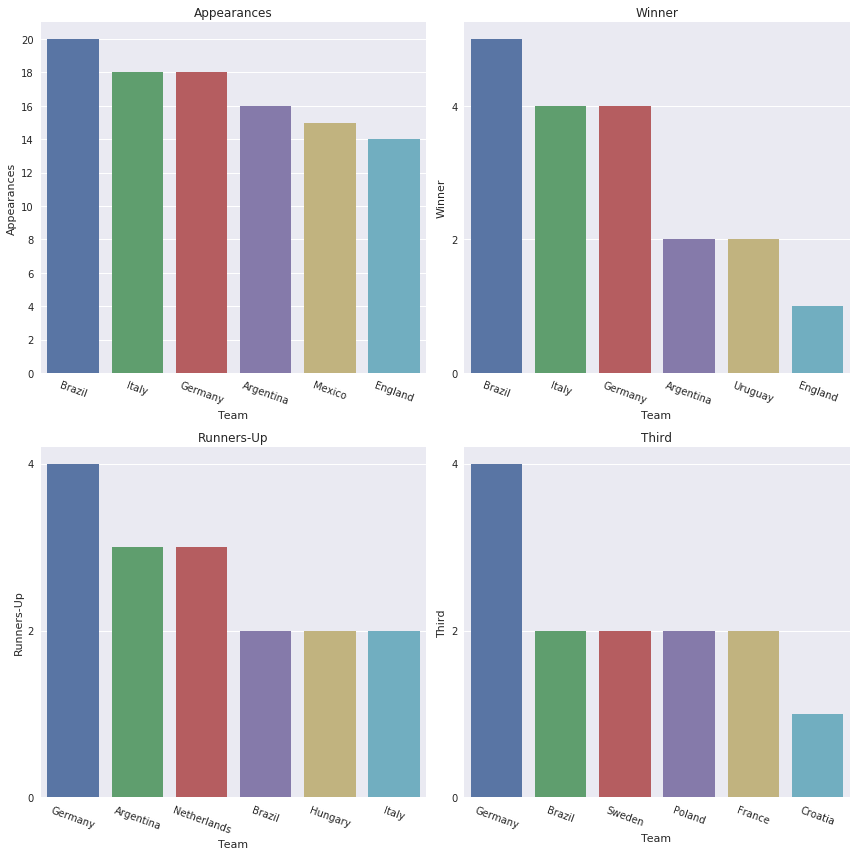

In [22]:
columns = ['Appearances', 'Winner', 'Runners-Up', 'Third']
TeamsBarPlots(columns)

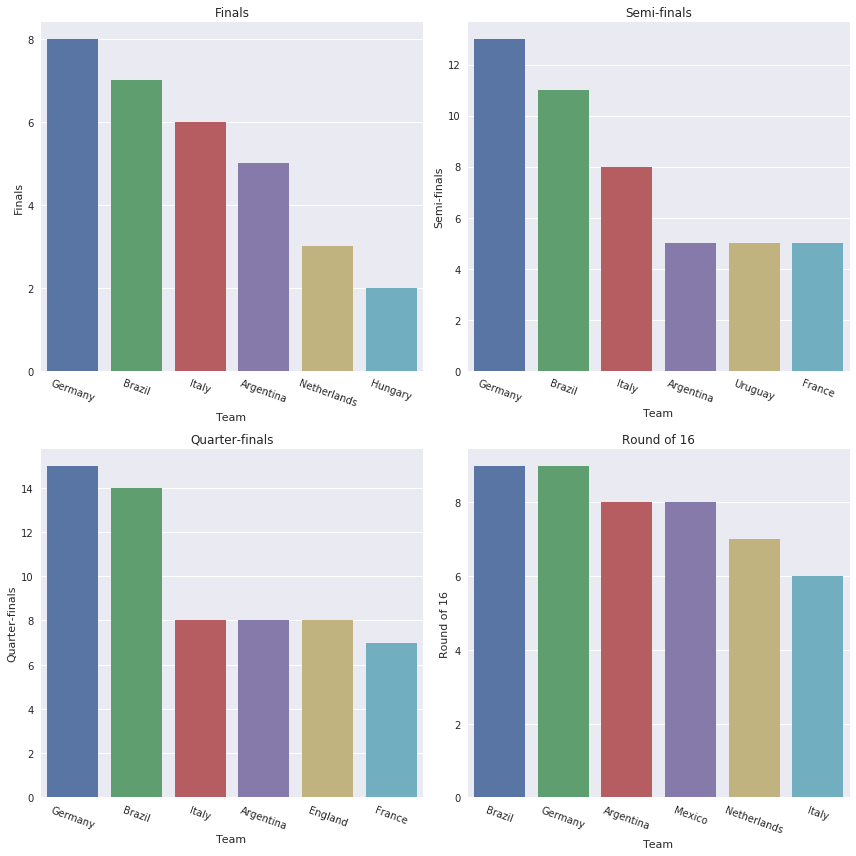

In [23]:
columns = ['Finals', 'Semi-finals', 'Quarter-finals', 'Round of 16']
TeamsBarPlots(columns)

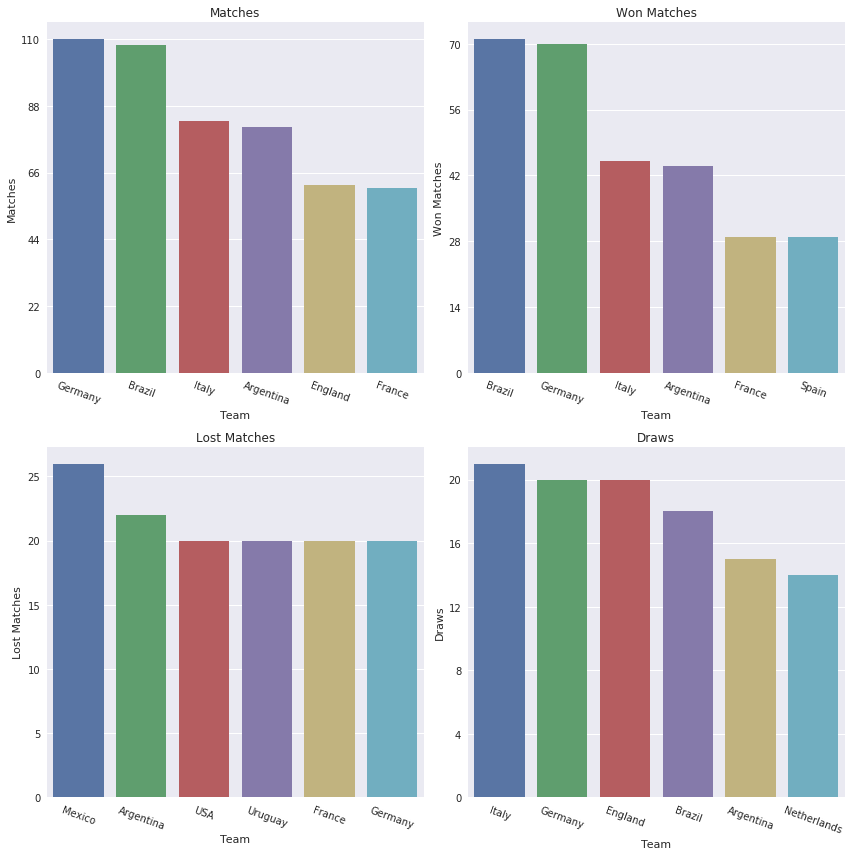

In [24]:
columns = ['Matches', 'Won Matches', 'Lost Matches', 'Draws']
TeamsBarPlots(columns)

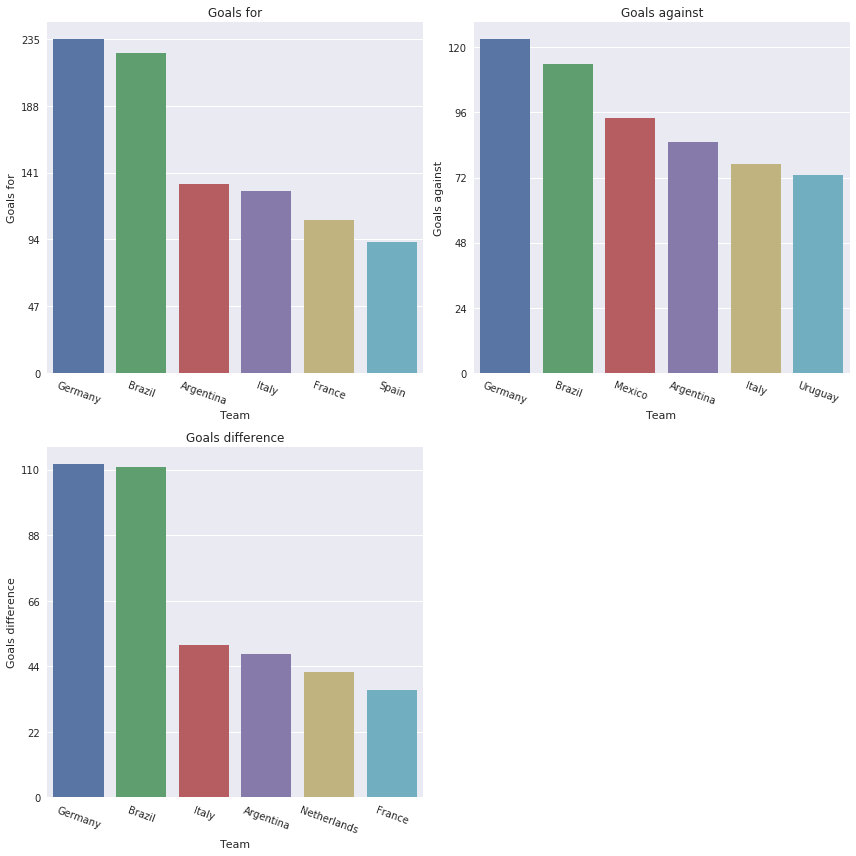

In [25]:
columns = ['Goals for', 'Goals against', 'Goals difference']
TeamsBarPlots(columns)